## <center>**Notebook <span style= 'color: #FDCA40'>introduction</span>**

This notebook is a remake of my old movies analysis project made specifically for my youtbe video and this notebook is<br>
a part of three parts of data viuslization tools I also put in my video.

#### **Limitations of the project:**
This project **isn't made** to show case my data analytics skills it was made only to learn you how to create beautiful visualizations<br>
and dashboards so don't expect:
- Data mining nor scraping
- Data cleaning
- EDA
- ML
- Conclusions

It only showcase some of my data visualization skills

*This project was made only in about **8 hours** with all of the visualization tools

#### **Questions for this notebook**:
- Finding the correlations between budget and rate
- Finding correlation between Movies revenue and budget in the last years.
- Top 10 movies in revenue before 21 centrury.
- Top 10 Directors in films count
- Top watched film genres

## <center>**<span style= 'color: #FDCA40'>Importing</span> the packeges**

In [7]:
import matplotlib.colors as mcolors
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
from datetime import datetime
import matplotlib
import seaborn as sns
import pandas as pd
import numpy as np
import requests
import warnings

In [8]:
%matplotlib inline
warnings.filterwarnings('ignore')

FONT             :int  = 20
COLORS           :list = ['#080708', '#3772FF', '#DF2935', '#FDCA40', '#c8c8c8']

## <center>**Reading the<span style= 'color: #FDCA40'> data</span>**

In [9]:
cm = sns.light_palette(COLORS[1], as_cmap=True)
df = pd.read_csv(r'data/tmdb_movies_data.csv')

display(df.drop(['overview', 'keywords', 'genres', 'production_companies',
                 'tagline', 'cast'], axis= 1)
        .sample(5).style.background_gradient(cmap= cm))

,id,imdb_id,popularity,budget,revenue,original_title,homepage,director,runtime,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
1761,25642,tt1327701,0.242239,40000000,0,Ben 10: Alien Swarm,nan,Alex Winter,69,1/1/2009,23,4.400000,2009,40656017.360000,0.000000
2410,603,tt0133093,7.753899,63000000,463517383,The Matrix,http://www.warnerbros.com/matrix,Lilly Wachowski|Lana Wachowski,136,3/30/1999,6351,7.800000,1999,82470329.340000,606768749.700000
305,359983,tt4938602,0.250209,0,0,The Lion Guard: Return of the Roar,nan,Howy Parkins,44,11/22/2015,48,5.900000,2015,0.000000,0.000000
10815,31657,tt0077362,0.065504,3000000,0,Coming Home,nan,Hal Ashby,127,2/15/1978,16,5.800000,1978,10028102.080000,0.000000
6544,38828,tt0443567,0.063234,0,0,Left Behind III: World at War,nan,Craig R. Baxley,95,1/1/2005,12,5.100000,2005,0.000000,0.000000


In [10]:
display(df.drop(['overview', 'keywords', 'genres', 'production_companies',
                 'tagline'], axis= 1)
        .sample(5).style.highlight_null(color= COLORS[2]))

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,runtime,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
9611,801,tt0093105,1.011111,13000000,123922370,"Good Morning, Vietnam",Robin Williams|Forest Whitaker|Tung Thanh Tran|Chintara Sukapatana|Bruno Kirby,nan,Barry Levinson,121,12/23/1987,363,7.000000,1987,24948045.690000,237816996.100000
939,239562,tt2465140,0.408464,0,16337881,The Single Moms Club,Wendi McLendon-Covey|Tyler Perry|Ryan Eggold|Amy Smart|Terry Crews,nan,Tyler Perry,111,3/14/2014,32,6.000000,2014,0.000000,15048675.980000
4204,10510,tt0110527,0.951117,0,46264384,Miracle on 34th Street,Richard Attenborough|Elizabeth Perkins|Dylan McDermott|J. T. Walsh|James Remar,nan,Les Mayfield,114,11/18/1994,110,6.400000,1994,0.000000,68060070.190000
2551,9684,tt0158371,0.281948,0,0,Sweet and Lowdown,Woody Allen|Ben Duncan|Daniel Okrent|Dan Moran|Tony Darrow,nan,Woody Allen,95,12/3/1999,48,6.500000,1999,0.000000,0.000000
7280,15516,tt0068833,0.384193,90000,0,The Last House on the Left,Sandra Peabody|Lucy Grantham|David Hess|Fred J. Lincoln|Jeramie Rain,nan,Wes Craven,84,1/1/1972,46,6.100000,1972,469310.483800,0.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

## <center>**Basic<span style= 'color: #FDCA40'> cleaning</span>**

In [12]:
def z_score_method(series: pd.Series, threshold=3):
    '''
    This function detects outliers in a pandas Series using the Z-score method
    and replaces them with NaNs.
    :param series: A pandas Series.
    :param threshold: The Z-score threshold for outlier detection (default is 3).
    :returns: A new Series with outliers replaced by NaNs.
    '''

    z_scores = np.abs((series - series.mean()) / series.std())
    outlier_mask = z_scores > threshold

    filtered_series = series.copy()
    filtered_series[outlier_mask] = np.nan
    
    return filtered_series

In [7]:
df['release_date'] = df['release_date'].astype('datetime64[ns]')

continous_col = ['budget', 'revenue', 'popularity',
                 'runtime', 'vote_count', 'vote_average']


df_outliers_free = df[df['revenues'] == 0].copy()

for col in continous_col:
    df_outliers_free[col] = z_score_method(df_outliers_free[col])

df_outliers_free.dropna(subset= continous_col, inplace=True)

## <center>**Visualizing the<span style= 'color: #FDCA40'> data</span>**

In [14]:
def extract_genres(row):
    
    genres_list = row.split('|')
    return genres_list

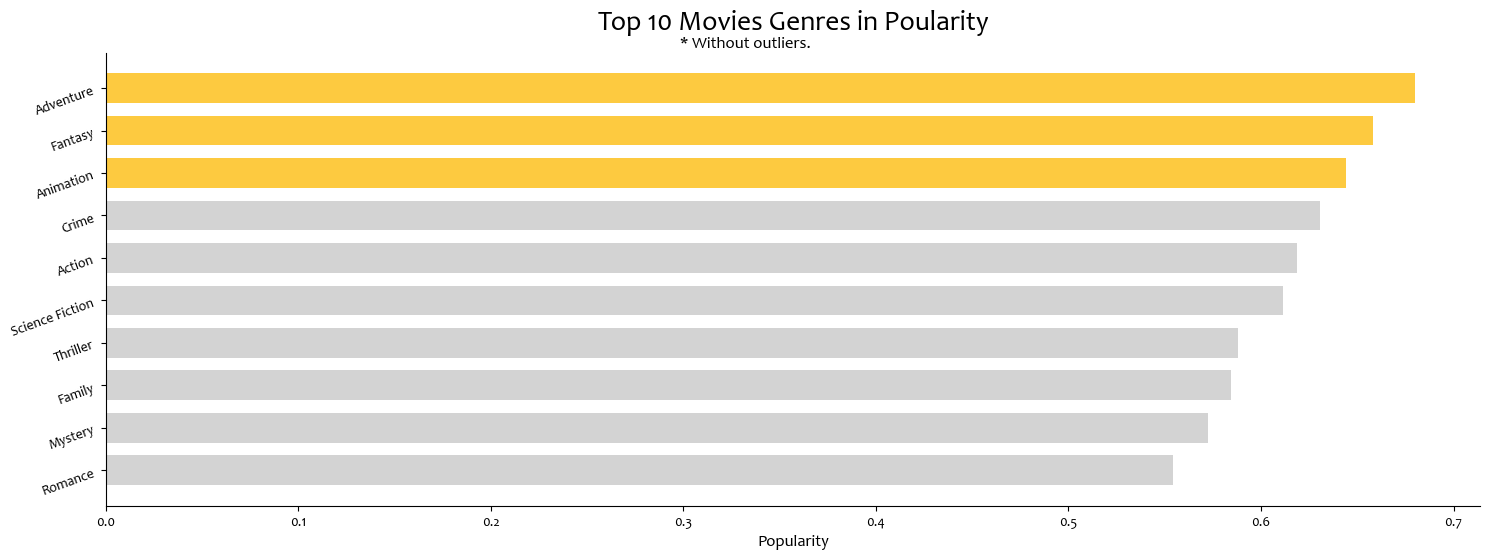

In [138]:
plt.rcParams['font.family'] = 'Candara'
fig, ax = plt.subplots()


genres_df = df_outliers_free.assign(genres= df_outliers_free['genres'].dropna().apply(extract_genres)).explode('genres')
genres_df = genres_df.groupby('genres')['popularity'].mean()
genres_df = genres_df.sort_values().tail(10)

colors_temp = ['lightgrey'] * 7
colors_temp += [COLORS[3]] * 3

ax.barh(genres_df.index, genres_df.values, color= colors_temp, height=0.7)
ax.spines[['right', 'top']].set_visible(False)

ax.set_title('Top 10 Movies Genres in Poularity', fontsize= FONT, pad= 17)
ax.set_xlabel('Popularity', fontsize= FONT * 3/5)

plt.suptitle('* Without outliers.', y=0.88, fontsize=12)

plt.yticks(rotation=20)
fig.set_size_inches(15, 6)
plt.tight_layout()

plt.savefig('plots/Top 10 Movies Genres in Poularity.png')
plt.show()

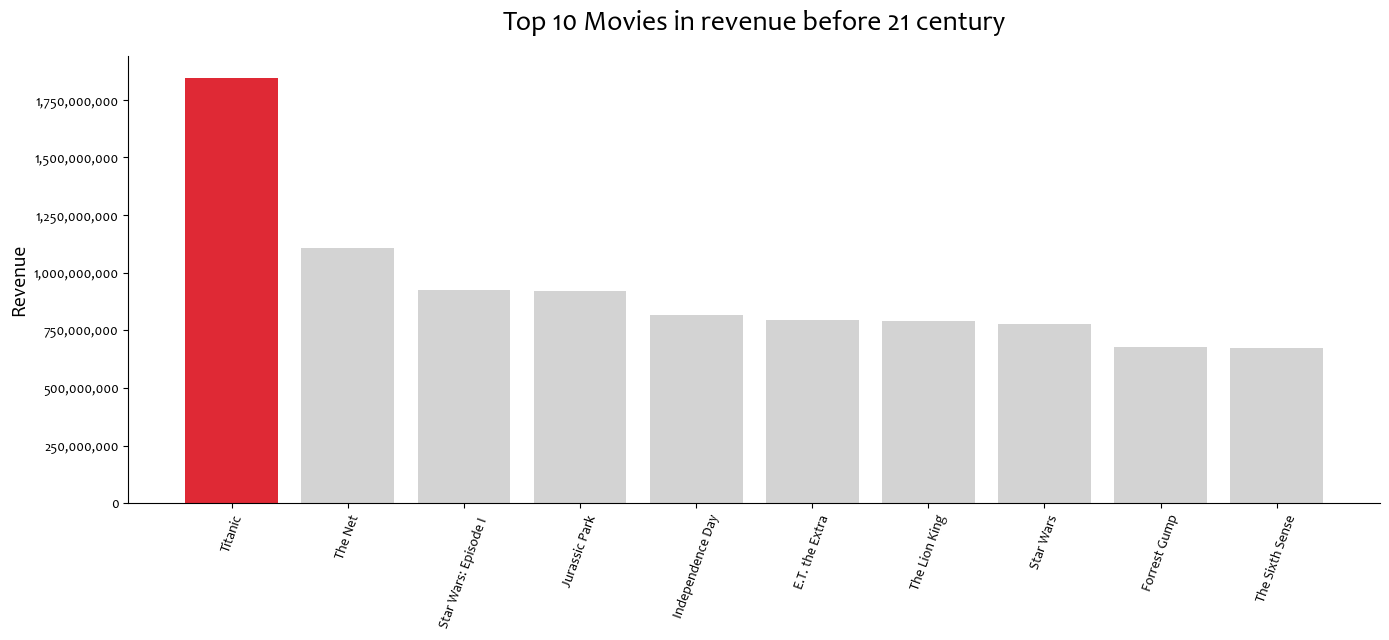

In [139]:
fig, ax = plt.subplots()

century_21 = datetime.strptime('2000', '%Y')
top10_movies = df.sort_values('revenue',  ascending=[0])[df['release_date'] < century_21].head(10)

colors_temp = [COLORS[2]] * 1
colors_temp += ['lightgrey'] * 9

ax.bar(x=      top10_movies['original_title'].str.split('-').str[0],
       height= top10_movies['revenue'],
       color=  colors_temp)

ax.spines[['right', 'top']].set_visible(False)

ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

ax.set_title('Top 10 Movies in revenue before 21 century', fontsize= FONT, pad= 19)
ax.set_ylabel('Revenue', fontsize= FONT * 3.5/5)

plt.xticks(rotation=70)

fig.set_size_inches(14, 6.5)
plt.tight_layout()

plt.savefig('plots/Top 10 Movies in revenue before 21 century.png')

plt.show()

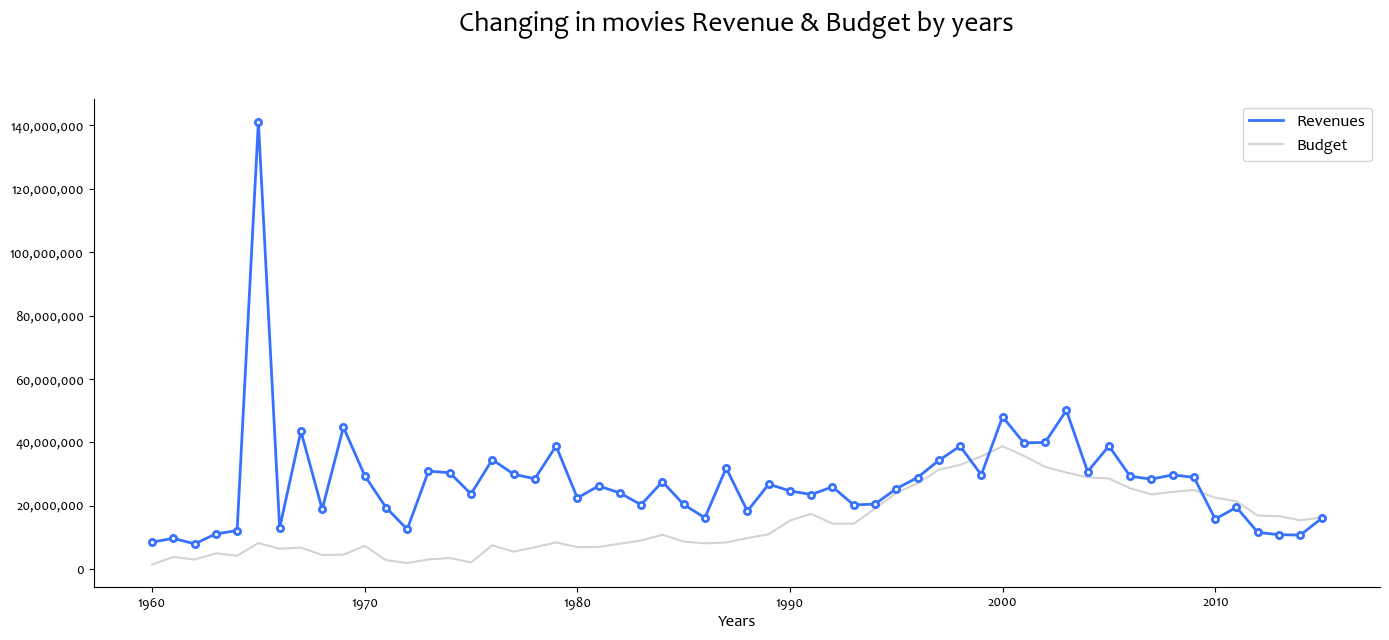

In [140]:
fig, ax = plt.subplots()

df_outliers_free['release_year'] = df_outliers_free['release_date'].dt.year
df_by_year = df_outliers_free[df_outliers_free['revenue'] > 0].groupby('release_year')

# ax.plot(df_by_year['revenue'].median().index, df_by_year['revenue'].median(), color=COLORS[1])
ax.plot(df_by_year['revenue'].median().index,
        df_by_year['revenue'].median(),
        color= COLORS[1], lw=2.0, zorder=10,
        label= 'Revenues')

ax.scatter(df_by_year['revenue'].median().index,
           df_by_year['revenue'].median(),
           fc='w', ec= COLORS[1], s=20, lw=2.0, zorder=12)



ax.plot(df_by_year['budget'].mean().index,
        df_by_year['budget'].mean(),
        color='lightgrey', lw=1.5,
        label= 'Budget')

# ax3.plot(df_by_year['vote_average'].median().index, df_by_year['vote_average'].median(), color=COLORS[1])
# ax3.set_ylabel('Vote average')


# for ax in (ax1, ax2, ax3):
ax.spines[['right', 'top']].set_visible(False)


# for ax in (ax1, ax2, ax3):
ax.get_yaxis().set_major_formatter(
    plt.FuncFormatter(lambda x, p: format(int(x), ',')))


ax.set_title('Changing in movies Revenue & Budget by years', fontsize=FONT, pad=50)
ax.set_xlabel('Years', fontsize=FONT*3/5)

plt.legend(fontsize= FONT*3/5)
fig.set_size_inches(14, 6.5)
plt.tight_layout()

plt.savefig('plots/Changing in movies Revenue & Budget by years.png')
plt.show()

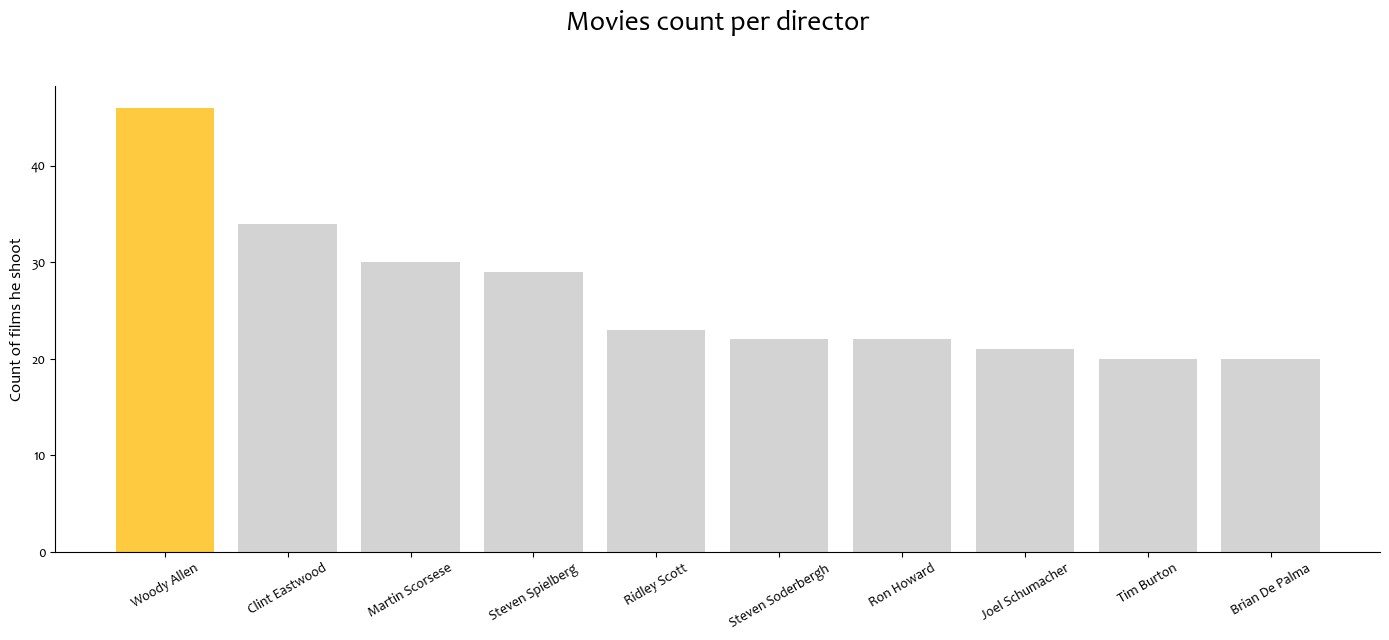

In [141]:
fig, ax = plt.subplots()

directors = df['director'].str.split('|').str[0]

directors_appearences = directors.value_counts(sort=True).head(10)
directors_appearences.index = directors_appearences.index.map(str)

colors_temp = [COLORS[3]] * 1
colors_temp += ['lightgrey'] * 9

ax.spines[['right', 'top']].set_visible(False)

ax.bar(x= directors_appearences.index.values, height= directors_appearences,
        color= colors_temp)

plt.xticks(rotation= 30)
ax.set_ylabel('Count of films he shoot', fontsize= FONT*3/5)
ax.set_title('Movies count per director', fontsize= FONT, pad= 40)

fig.set_size_inches(14, 6.5)
plt.tight_layout()
plt.savefig('plots/Movies count per director.png')

plt.show()

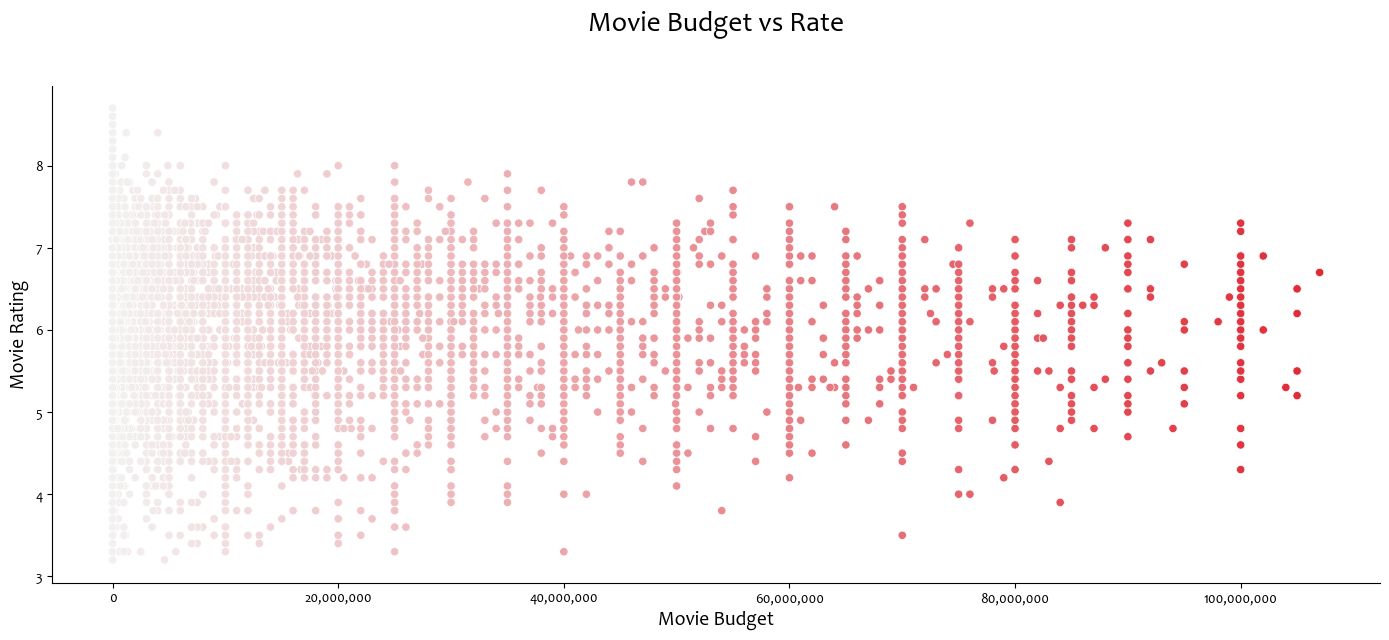

In [145]:
fig, ax = plt.subplots()

palette = sns.color_palette(f'light:{COLORS[2]}', as_cmap= True)

ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

sns.scatterplot(data= df_outliers_free[df_outliers_free['budget'] = 0], x= 'budget', y= 'vote_average',
                ax = ax, color= COLORS[1], hue= 'budget',
                palette= palette, legend= False)

ax.set_title('Movie Budget vs Rate', fontsize= FONT, pad= 40)
ax.spines[['right', 'top']].set_visible(False)

ax.set_ylabel('Movie Rating', fontsize= FONT*3.5/5)
ax.set_xlabel('Movie Budget', fontsize= FONT*3.5/5)

fig.set_size_inches(14, 6.5)
plt.tight_layout()

plt.savefig('plots/Movie Budget vs Rate.png')
plt.show()

In [5]:
# ==============Importing Packeges & setting constants=============

# from google.cloud import bigquery
from itertools import count
from dotenv import load_dotenv

import seaborn as sns
import pandas as pd
import numpy as np
import requests
import os

load_dotenv()

TMBD_API_KEY  : str  = os.getenv('TMBD_API_KEY')
COLORS        : list = ['#080708', '#3772FF', '#DF2935', '#FDCA40', '#E6E8E6']
MAX_PAGE      : int  = 2

HEADERS       : dict = {'accept': 'application/json',
                        'Authorization': f'Bearer {TMBD_API_KEY}'}
# =================================================================


# ===============Collecting the data and formatting it=============
movie_ids            : list = []
movies_titles        : list = []
overviews            : list = []
popularities         : list = []
ratings              : list = []
taglines             : list = []
runtimes             : list = []
revenues             : list = []
release_dates        : list = []
vote_counts          : list = []
budgets              : list = []
genres               : list = []
production_companies : list = []
    
movies_ids = []

for i in count(0):

    page : int = i + 1
    if page > MAX_PAGE:
        break

    discover_movies_url = f'https://api.themoviedb.org/3/discover/movie?include_adult=false' + \
                        '&include_video=false&language=en-US&page={page}&sort_by=popularity.desc'
    
    discover_movies_response = requests.get(discover_movies_url, headers= HEADERS).json()

    for movie in discover_movies_response['results']:
        movies_ids.append(movie['id'])


for movie_id in movies_ids:

    movie_details_url      = f"https://api.themoviedb.org/3/movie/{movie_id}?language=en-US"
    movie_details_response = requests.get(movie_details_url, headers= HEADERS).json()
    
    movie_ids     .append(movie_details_response['id'])
    movies_titles .append(movie_details_response['original_title'])
    overviews     .append(movie_details_response['overview'])
    popularities  .append(movie_details_response['popularity'])
    ratings       .append(movie_details_response['vote_average'])
    taglines      .append(movie_details_response['tagline'])
    runtimes      .append(movie_details_response['runtime'])
    revenues      .append(movie_details_response['revenue'])
    release_dates .append(movie_details_response['release_date'])
    vote_counts   .append(movie_details_response['vote_count'])
    budgets       .append(movie_details_response['budget'])
    
    genres                .append([d['name'] for d in movie_details_response['genres']])
    production_companies  .append([d['name'] for d in movie_details_response['production_companies']])


movies_data  =  pd.DataFrame({'movie_id' : movie_ids,
                'movie_title'            : movies_titles,
                'overview'               : overviews,
                'popularity'             : popularities ,
                'rating'                 : ratings,
                'tagline'                : taglines,
                'runtime'                : runtimes,
                'revenue'                : revenues,
                'release_data'           : release_dates,
                'vote_count'             : vote_counts,
                'budget'                 : budgets,
                'genres'                 : genres,
                'production_companies'   : production_companies})

# =================================================================


print(movies_data.head())


   movie_id                          movie_title  \
0    724209                       Heart of Stone   
1    569094  Spider-Man: Across the Spider-Verse   
2    976573                            Elemental   
3    615656                    Meg 2: The Trench   
4    667538     Transformers: Rise of the Beasts   

                                            overview  popularity  rating  \
0  An intelligence operative for a shadowy global...    3709.463   7.000   
1  After reuniting with Gwen Stacy, Brooklyn’s fu...    3407.083   8.448   
2  In a city where fire, water, land and air resi...    2933.943   7.800   
3  An exploratory dive into the deepest depths of...    1656.935   6.976   
4  When a new threat capable of destroying the en...    1520.550   7.491   

                                    tagline  runtime    revenue release_data  \
0                            Defy the odds.      124          0   2023-08-09   
1  It's how you wear the mask that matters.      140  683241751   2023

In [6]:
movies_data

,movie_id,movie_title,overview,popularity,rating,tagline,runtime,revenue,release_data,vote_count,budget,genres,production_companies
0,724209,Heart of Stone,An intelligence operative for a shadowy global...,3709.463,7.000,Defy the odds.,124,0,2023-08-09,777,0,"[Thriller, Action]","[Skydance, Pilot Wave Motion Pictures, Mocking..."
1,569094,Spider-Man: Across the Spider-Verse,"After reuniting with Gwen Stacy, Brooklyn’s fu...",3407.083,8.448,It's how you wear the mask that matters.,140,683241751,2023-05-31,3769,100000000,"[Animation, Action, Adventure]","[Columbia Pictures, Sony Pictures Animation, L..."
2,976573,Elemental,"In a city where fire, water, land and air resi...",2933.943,7.800,Opposites react.,102,458822015,2023-06-14,1422,200000000,"[Animation, Comedy, Family, Fantasy, Romance]","[Walt Disney Pictures, Pixar]"
3,615656,Meg 2: The Trench,An exploratory dive into the deepest depths of...,1656.935,6.976,Back for seconds.,116,319056482,2023-08-02,676,129000000,"[Action, Science Fiction, Horror]","[Apelles Entertainment, Warner Bros. Pictures,..."
4,667538,Transformers: Rise of the Beasts,When a new threat capable of destroying the en...,1520.550,7.491,Unite or fall.,127,429800000,2023-06-06,2937,195000000,"[Action, Adventure, Science Fiction]","[Skydance, Paramount, di Bonaventura Pictures,..."
5,346698,Barbie,Barbie and Ken are having the time of their li...,1411.092,7.400,She's everything. He's just Ken.,114,1291201242,2023-07-19,3377,145000000,"[Comedy, Adventure, Fantasy]","[LuckyChap Entertainment, Heyday Films, NB/GG ..."
6,298618,The Flash,When his attempt to save his family inadverten...,1368.289,6.953,Worlds collide.,144,268375616,2023-06-13,2504,300000000,"[Action, Adventure, Science Fiction]","[Warner Bros. Pictures, Double Dream, The Disc..."
7,1121575,Babylon 5: The Road Home,Travel across the galaxy with John Sheridan as...,1304.519,7.186,,80,0,2023-08-15,35,0,"[Animation, Science Fiction, Action, Adventure]",[Warner Bros. Animation]
8,884605,No Hard Feelings,"On the brink of losing her childhood home, Mad...",1199.947,7.131,Pretty. Awkward.,104,82995526,2023-06-15,898,45000000,"[Comedy, Romance]","[Excellent Cadaver, Odenkirk Provissiero Enter..."
9,709631,Cobweb,Eight year old Peter is plagued by a mysteriou...,1119.811,6.736,"Sooner or later, family secrets creep out.",88,1748486,2023-07-19,216,0,[Horror],"[Point Grey Pictures, Vertigo Entertainment, L..."


In [3]:
movies_ids

[724209,
 569094,
 976573,
 615656,
 667538,
 346698,
 298618,
 1121575,
 884605,
 709631,
 1006462,
 961420,
 385687,
 1149381,
 614479,
 644124,
 457332,
 447365,
 1008042,
 447277,
 724209,
 569094,
 976573,
 615656,
 667538,
 346698,
 298618,
 1121575,
 884605,
 709631,
 1006462,
 961420,
 385687,
 1149381,
 614479,
 644124,
 457332,
 447365,
 1008042,
 447277]